In [23]:
import numpy as np
import random

In [24]:
products = range(10000)
users = range(1000)
purchases = []
for p in range(10000):
    u = random.choice(users)
    p = random.choice(products)
    purchases.append((u, p))

In [25]:
products

range(0, 10000)

In [26]:
users

range(0, 1000)

In [27]:
purchases[:5]

[(992, 3887), (558, 2062), (994, 3473), (663, 9435), (67, 5326)]

In [28]:
import pandas as pd

data = pd.DataFrame(purchases)

In [29]:
data.head()

,0,1
0,992,3887
1,558,2062
2,994,3473
3,663,9435
4,67,5326


In [30]:
data.describe()

,0,1
count,10000.000000,10000.00000
mean,498.475000,5060.11610
std,288.749098,2906.30564
min,0.000000,0.00000
25%,250.000000,2569.50000
50%,499.000000,5071.50000
75%,750.250000,7577.25000
max,999.000000,9997.00000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
0    10000 non-null int64
1    10000 non-null int64
dtypes: int64(2)
memory usage: 156.3 KB


In [32]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 8)

In [33]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
model.labels_

array([5, 0, 5, ..., 5, 5, 0])

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
var = list(data.pop(1))

In [36]:
sed = data.values

In [37]:
merg = linkage(sed, method = 'complete')

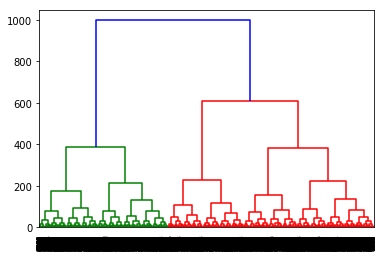

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

dendrogram(merg, labels = var, leaf_rotation= 90, leaf_font_size= 6)
plt.show()

In [40]:
data[:6]

,0
0,992
1,558
2,994
3,663
4,67
5,491


### Standardising the data to reduce the error and inc the performance

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

In [42]:
data[:5]

array([[ 1.70926829],
       [ 0.20615814],
       [ 1.71619507],
       [ 0.56981382],
       [-1.4943651 ]])

In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 8)

In [44]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
model.labels_

array([3, 4, 3, ..., 7, 6, 1])

In [46]:
model.cluster_centers_

array([[ 0.68518791],
       [-1.07445307],
       [-0.18999115],
       [ 1.52272857],
       [ 0.2485337 ],
       [-0.62926752],
       [ 1.1059255 ],
       [-1.51165502]])

In [48]:
model.n_clusters

8

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=1000)
model.fit_transform(data)